In [1]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

# Evaluating the method using synthetic data

As a first step, we will evaluate the method using synthetic data. We will generate a synthetic dataset with a known ground truth, and then evaluate the method on this dataset.


We implmented a synthetic dataset (see dataloader.py). Here we can modify a number of hyperparameters to generate synthetic datasets.

- `length_distribution` 
    The distribution of the length of the sequences. We can pass any distribution. For now, we will use a uniform distribution, normal distribution, and a long-tailed distribution (cauchy distribution).







In [25]:
from text_anomalies import SyntheicDataset
from lorem_text.lorem import WORDS
import numpy as np


def generate_sentence_factory(
    length_distribution,
    words=WORDS,
):
    """ Generates a function which can generate a sentence
    using a number of hyperparameters.

    Parameters
    ----------
    length_distribution : array of float
        Distribution of the number of words in a sentence.
    words : array of str, optional
        Words to use in the sentence. Defaults to WORDS from lorem_text.

    Returns
    -------
    function
        Function that generates a sentence
    """

    def generate_sentence():
        """Generates a sentence

        Parameters
        ----------
        n : int
            Number of sentences to generate

        Returns
        -------
        array of str
            Array of sentences
        """
        # Number of words
        n = length_distribution(1)[0]

        n = max(1, n)

        # Generate sentence
        s = " ".join(np.random.choice(words, round(n)))

        return "%s%s%s" % (s[0].upper(), s[1:], ".")

    return generate_sentence



class Uniform:
    """Uniform distribution"""

    def __init__(self, a, b):
        """
        Parameters
        ----------
        a : float
            Lower bound of the distribution
        b : float
            Upper bound of the distribution
        """    
        self.a = a
        self.b = b

    def __call__(self, n):
        return np.random.uniform(self.a, self.b, n)

class Normal:
    """Normal distribution"""

    def __init__(self, mu, sigma):
        """
        Parameters
        ----------
        mu : float
            Mean of the distribution
        sigma : float
            Standard deviation of the distribution
        """
        self.mu = mu
        self.sigma = sigma

    def __call__(self, n):
        return np.random.normal(self.mu, self.sigma, n)

class Cauchy:
    """Cauchy distribution"""

    def __init__(self, mu, gamma):
        """
        Parameters
        ----------
        mu : float
            Mean of the distribution
        gamma : float
            Scale of the distribution
        """
        self.mu = mu
        self.gamma = gamma

    def __call__(self, n):
        return np.random.standard_cauchy(n) * self.gamma + self.mu



## Synthetic dataset 1: Different words (Very easy)

Here we generate a synthetic dataset where the words underlying words differ. This should be very easy
to distinguish between the different underlying datasets. For now we keep all distributions uniform. Additionally, with a different number of words in the vocabulary, it should be easy to distinguish between the different datasets.


In [32]:
# Create different dataloaders

# Load vocabulary
wordlist1 = WORDS
wordlist2 = [
    "attachment",
    "vertical",
    "rent",
    "breed",
    "knee",
    "mathematics",
    "bride",
    "represent",
    "pioneer",
    "tolerate",
    "concrete",
    "motif",
    "art",
    "clerk",
    "company",
    "conglomerate",
    "extend",
    "pneumonia",
    "enter",
    "satellite",
    "bronze",
    "bad",
    "perception",
    "deprive",
    "care",
    "excavation",
    "name",
    "trade",
    "exotic",
    "press",
    "ice",
    "range",
    "listen",
    "mayor",
    "preach",
    "withdrawal",
    "season",
    "cancer",
    "stimulation",
    "character",
    "eye",
    "lawyer",
    "hesitate",
    "franchise",
    "minimize",
    "whole",
    "take",
    "self",
    "generate",
    "host",
    "benefit",
    "bottom",
    "authority",
    "statement",
    "urgency",
    "fish",
    "class",
    "physics",
    "attic",
    "sweater",
    "live",
    "prosper",
    "relaxation",
    "cereal",
    "clock",
    "relief",
    "census",
    "restrain",
    "trick",
    "dive",
    "bless",
    "moving",
    "strength",
    "humor",
    "commemorate",
    "plaintiff",
    "passion",
    "pride",
    "assignment",
    "solo",
    "performer",
    "fence",
    "manner",
    "chocolate",
    "gain",
    "visit",
    "secretary",
    "rock",
    "fashionable",
    "expression",
    "girlfriend",
    "skip",
    "suffer",
    "he",
    "constitutional",
    "acceptance",
    "grateful",
    "baseball",
    "illustrate",
    "debt"
]

n = 2
generate = [
    generate_sentence_factory(Uniform(2, 12), wordlist1),
    generate_sentence_factory(Uniform(2, 12), wordlist2),
]
ratios = [0.5, 0.5]

synthetic_1 = SyntheicDataset(
    generate,
    ratios
)

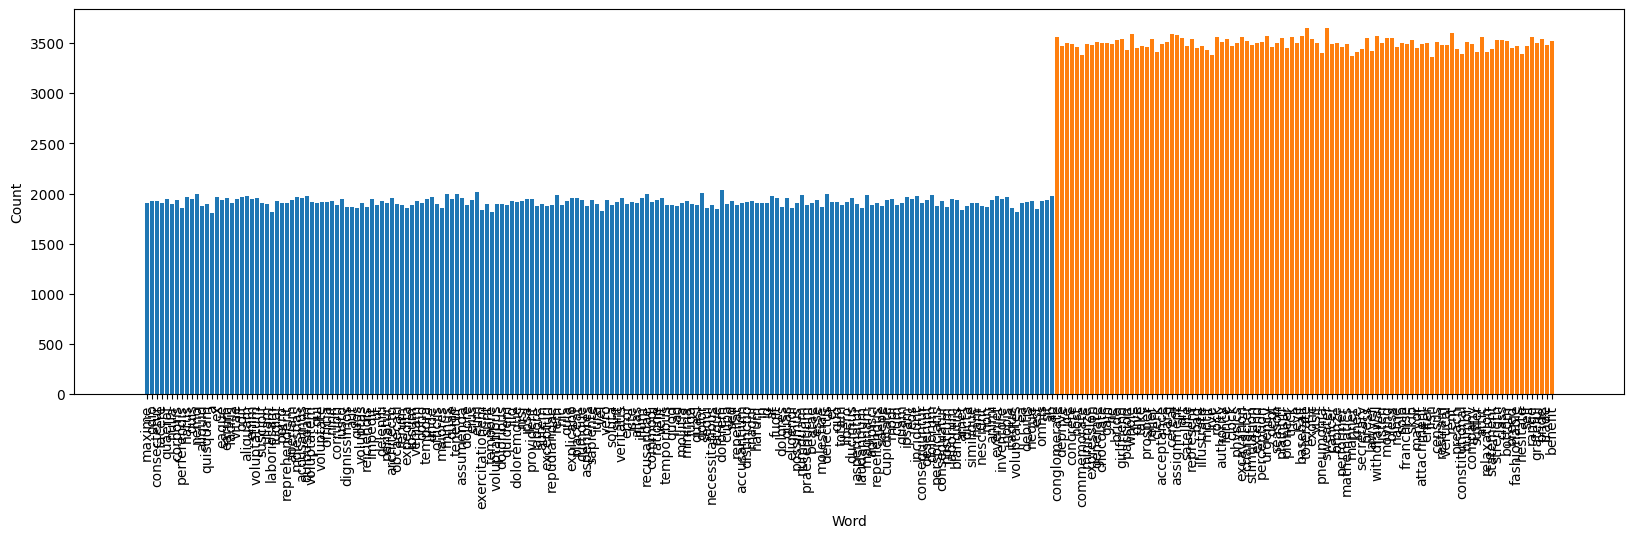

In [41]:
# Create a small plot displaying the word histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
word_counts = {}
for sentence in synthetic_1:
    for word in sentence.lower().replace(".","").split(" "):
        word_counts[word] = word_counts.get(word, 0) + 1

# Filter by wordlist
word_counts_1 = {k: v for k, v in word_counts.items() if k in wordlist1}
word_counts_2 = {k: v for k, v in word_counts.items() if k in wordlist2}

# Plot
plt.bar(word_counts_1.keys(), word_counts_1.values(), label="Wordlist 1")
plt.bar(word_counts_2.keys(), word_counts_2.values(), label="Wordlist 2")


plt.xlabel("Word")
plt.ylabel("Count")
# Rotate x labels
_ = plt.xticks(rotation=90)


## Synthetic dataset 2: Different length distributions

Here we generate a synthetic dataset where the length distributions differ. This should be harder for the method to distinguish between the different underlying datasets. 

We can make this more difficult by using other distributions or make the distributions more similar.

In [42]:
generate = [
    generate_sentence_factory(Normal(10, 2)),
    generate_sentence_factory(Normal(20, 2)),
]
ratios = [0.5, 0.5]

synthetic_2 = SyntheicDataset(
    generate,
    ratios
)

Text(0, 0.5, 'Count')

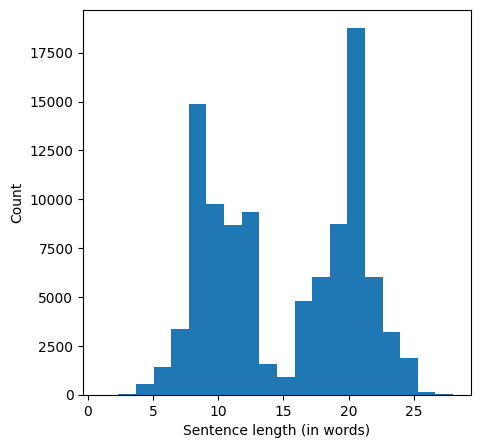

In [52]:
# Plot the hist of the length of the sentences
plt.figure(figsize=(5, 5))
lengths = [len(sentence.split(" ")) for sentence in synthetic_2]

# Plot
_ = plt.hist(lengths, bins=20)

# Markup
plt.xlabel("Sentence length (in words)")
plt.ylabel("Count")


In [16]:
import nltk
nltk.data.path
nltk.corpus.gutenberg.sents("melville-moby_dick.txt")

[['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']'], ['ETYMOLOGY', '.'], ...]

In [22]:
nltk.lm.Vocabulary(nltk.corpus.gutenberg.words("melville-moby_dick.txt"))

Counter({'[': 3,
         'Moby': 84,
         'Dick': 84,
         'by': 1137,
         'Herman': 1,
         'Melville': 1,
         '1851': 3,
         ']': 1,
         'ETYMOLOGY': 1,
         '.': 6862,
         '(': 210,
         'Supplied': 2,
         'a': 4569,
         'Late': 1,
         'Consumptive': 1,
         'Usher': 2,
         'to': 4542,
         'Grammar': 2,
         'School': 1,
         ')': 78,
         'The': 612,
         'pale': 18,
         '--': 1070,
         'threadbare': 1,
         'in': 3916,
         'coat': 28,
         ',': 18713,
         'heart': 90,
         'body': 110,
         'and': 6024,
         'brain': 37,
         ';': 4072,
         'I': 2124,
         'see': 253,
         'him': 1058,
         'now': 646,
         'He': 230,
         'was': 1632,
         'ever': 203,
         'dusting': 2,
         'his': 2459,
         'old': 436,
         'lexicons': 1,
         'grammars': 2,
         'with': 1659,
         'queer': 44,
         '